# 懶人函式_v1

In [2]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
from statsmodels.stats.stattools import durbin_watson
import statsmodels
import statistics as stat
import statistics
import math
from sklearn.utils import shuffle

In [27]:
def my_inference(p_value, alpha, claim):
    if p_value < alpha:
        print(f"Since the p_value = {p_value:.4f} < {alpha}, we reject the null hypothesis.\nThat is, we have sufficient evidence to claim that {claim}.")
    else:
        print(f"Since the p_value = {p_value:.4f} > {alpha}, we do not reject the null hypothesis.\nThat is, we do not have sufficient evidence to claim that {claim}.")

def my_normality_check(sample_data, data_name, data_unit, alpha):
    # histogram
    fig, ax = plt.subplots()
    counts, bins, patches = plt.hist((sample_data.dropna()).astype(float), 6, density=False, facecolor='g', alpha=0.75)
    plt.title(f'Histogram of {data_name}')
    plt.xlabel(data_unit)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    # Shapiro-Wilk test
    print("Shapiro-Wilk test for normality:")
    print("H0: The distribution is normal.")
    print("H1: The distribution is not normal.")
    stat, p = stats.shapiro(sample_data.dropna())
    print(f'For population = {data_name}')
    print(f"Shapiro statistic = {stat:.6f} and p_value = {p:.6f}")
    p_value = p; claim = "the distribution is not normal"
    my_inference(p_value, alpha, claim)
    
    # QQ plot
    fig = sm.qqplot(sample_data.dropna(), stats.norm, fit=True, line='45')
    plt.title(f'Q-Q Plot for {data_name}')
    plt.show()

def my_scatter_plot(sample_data, X_name, Y_name, X_unit, Y_unit):
    _ = sns.regplot(x = sample_data[X_name], y = sample_data[Y_name], color = 'b', ci = None)
    plt.title(f'Scatter Plot for {X_name} and {Y_name}')
    plt.xlabel(f'{X_name} ({X_unit})')
    plt.ylabel(f'{Y_name} ({Y_unit})')
    plt.show()
    
def Sample_Mean_Hypothesis_Testing(x, H0_x_bar, a):
    x_bar = x.mean()
    x_std = stat.stdev(x)
    x_n = x.size
    print(f"mean = {x_bar:.4f}")
    print(f"std. dev. = {x_std:.4f}")
    print(f"Number of observation = {x_n}")
    print(f"Hypothesized mean = {H0_x_bar}")
    print(f"Significant level = {a}")
    tstat = (x_bar - H0_x_bar) / (x_std / (x_n ** 0.5))
    print(f"t-stat = {tstat:.4f}")
    if tstat > 0:
        tcv_onetail = stats.t.ppf(1 - a, df = x_n - 1)
    else:
        tcv_onetail = stats.t.ppf(a, df = x_n - 1)    
    print(f"t critical value one tail = {tcv_onetail:.4f}")
    if tstat > 0:
        p_onetail = 1 - stats.t.cdf(tstat, df = x_n - 1)
    else:
        p_onetail = stats.t.cdf(tstat, df = x_n - 1)
    print(f"p-value (one-tail) = {p_onetail:.4f}")
    if tstat > 0:
        tcv_twotail = stats.t.ppf(1 - a/2, df = x_n - 1)
    else:
        tcv_twotail = stats.t.ppf(a/2, df = x_n - 1)
    print(f"t critical value two tail = {tcv_twotail:.4f}")
    p_twotail = p_onetail * 2
    print(f"p-value (two-tail) = {p_twotail:.4f}")
    return p_onetail, p_twotail

def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

def required_conditions_for_error(SD, y_pre, Y_name):
    # check required conditions
    print('Checking for required conditions for error variable:\n')

    mu = np.mean(SD)
    sigma = np.std(SD)
    
    ## The error is a random variable with mean of zero.
    print('\n1. Zero mean')
    print(f'H0: Errors have zero mean.')
    print(f'H1: Errors do not have zero mean.')
    H0_x_bar = 0
    p_onetail, p_twotail = Sample_Mean_Hypothesis_Testing(SD, H0_x_bar, alpha)
    claim = "the errors do not have zero mean"
    my_inference(p_twotail, alpha, claim)
    
    print(f'\n2. Normality')
    print(f'H0: Errors are normally distributed.')
    print(f'H1: Errors are not normally distributed.')
    
    
    ## The error is a normally distributed random variable.
    my_normality_check(pd.Series(SD), "standarized residuals", "unit", alpha)
    
    ## The variance of the error term is the same for all values of the independent variable.
    print('\n3. Homoskedasticity')
    print('H0: Homoskedasticity')
    print('H1: Heteroskedasticity')
    
    plt.plot(y_pre, SD, 'o', color = 'gray')
    plt.axhline(y=0, color = 'blue')
    plt.axhline(y=2, color = 'red')
    plt.axhline(y=-2, color = 'red')
    plt.title('Standardized Residual Plot')
    plt.xlabel(Y_name)
    plt.ylabel('Standardized Residual')
    plt.show()
    print('Do not rejected H0. Heteroscedasticity does not appear to be a problem.')
    
    
    ## The values of the error are independent
    print('\n4. Independence')
    print('\n4-1. Randomness')
    print('H0 : Randomness exists.')
    print('H1 : Randomness does not exist.')
    SD_median = statistics.median(SD)
    Z_pval = runsTest(SD, SD_median)
    print('p_value for Z-statistic= ', Z_pval)
    claim = 'randomness does not exist'
    my_inference(Z_pval, alpha, claim)
    
    print('\n4-2. No Autocorrelation')
    print('H0 : There is no first-order correlation.')
    print('H1 : There is first-order correlation.')
    
#     d = Durbin_Watson_test(x)
    
def my_multicollinearity_test(y, X):
    data = pd.concat([y, X], axis=1)
    corr = data.corr()
    _ = sns.heatmap(corr, annot=True)
    multicollinearity_pairs = []
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if (corr.iloc[i, j] > 0.7):
                multicollinearity_pairs.append((corr.columns[i], corr.columns[j]))
    if len(multicollinearity_pairs) == 0:
        print("Multicollinearity will not be a problem.")
    else:
        print(f"Multicollinearity exists between {multicollinearity_pairs}.")
    return multicollinearity_pairs

def my_outlier(SD):
    df = pd.DataFrame(SD,columns = ['SD'])
    filter = (df['SD'] < -2) | (df['SD'] > 2)
    outliers = df['SD'].loc[filter]
    if len(outliers) == 0:
        print('There are no outliers.')
    else:
        print("Outliers by SD = \n")
        print(outliers)
        print('\nOutliers:')
        out = ''
        indices = outliers.index
        for i, idx in enumerate(indices):
            if i == len(indices) - 1:
                out += f'sample {idx + 1}.'
            else:
                out += f'sample {idx + 1}, '
        print(out)
        
def my_hii(X, ols_result):
    H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))
    df_h = pd.DataFrame({
        'hii': np.diagonal(H)
    })
    k = ols_result.df_model
    n = len(df_h['hii'])
    h_level = 3 * (k + 1) / n 
    print("h_level = ", h_level)
    print(" \n")
    filter = (df_h['hii'] > h_level )
    hii = df_h['hii']
    inf_hii = hii.loc[filter]
    if len(inf_hii) == 0:
        print('There are no influential observations by hii.')
    else:
        print("Influential observations by hii = \n")
        print(inf_hii)
        print('\Influential observations:')
        out = ''
        indices = inf_hii.index
        for i, idx in enumerate(indices):
            if i == len(indices) - 1:
                out += f'sample {idx + 1}.'
            else:
                out += f'sample {idx + 1}, '
    return hii, inf_hii
    

def my_cooks_distance(ols_result, data, hii):
    s2_e = ols_result.mse_resid
    k = ols_result.df_model
    y_a = data[:, 1]
    y_f = data[:, 2]
    CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * hii / np.square(1 - hii)
    CD = np.array(CD_arr)
    df_cd = pd.DataFrame(CD,columns = ['CD'])
    filter = (df_cd['CD'] > 1 )
    inf_cd = df_cd['CD'].loc[filter]
    
    if len(inf_cd) == 0:
        print("There are no influential observations by Cook's Distances.")
    else:
        print("Influential observations by Cook's Distances = \n")
        print(inf_cd)
        print('\Influential observations:')
        out = ''
        indices = inf_cd.index
        for i, idx in enumerate(indices):
            if i == len(indices) - 1:
                out += f'sample {idx + 1}.'
            else:
                out += f'sample {idx + 1}, '
    return inf_cd

def my_simple_linear_regression(sample_data, X_name, Y_name, X_unit, Y_unit, alpha):
    # scatter plot
    my_scatter_plot(sample_data, X_name, Y_name, X_unit, Y_unit)
    
    # ols regression
    ols_result = smf.ols(f'{Y_name} ~ {X_name}', data = sample_data).fit()  
    display(ols_result.summary())
    b1 = ols_result.params[1]
    b0 = ols_result.params[0]
    print(f"Estimated model: {Y_name} = {b0:0.4f} + {b1:0.4f} {X_name}")
    
    ## interpret the model
    print(f'The intercept is b0 = {b0:0.4f}.')
    print(f'The slope of the line is b1 = {b1:0.4f}. For each additional {X_unit} on {X_name}, \
          {Y_name} decreases by an average of {b1:0.4f} {Y_unit}.')
    

    
    # check required conditions
    
    ## required conditions for error term
    st, data, ss = sso.summary_table(ols_result, alpha = alpha)
    SD = data[:, 10]
    y_pre = data[:, 2]
    
    required_conditions_for_error(SD, y_pre, Y_name)
    
    # detecting outliers
    my_outlier(SD)
    
    # influential observations
    ## hii
    hii, inf_hii = my_hii(sample_data.drop(sample_data.columns[0], axis = 1) , ols_result)
    
    ## cook's distance
    my_cooks_distance(ols_result, data, hii)
    
    # assessing the model
    print('Assessing the model:')
    ## standard error of estimate
    print('Assessment 1: standard error of estimate')
    s2_e = ols_result.mse_resid
    print(f'MSE: {s2_e:.4f}')
    s_e = ols_result.mse_resid ** 0.5
    print(f'Standard errors: {s_e:.4f}')
    print(f"mean of y = {sample_data[Y_name].mean():.4f}")
    print(f"variance of y = {sample_data[Y_name].var(ddof=1):.4f}")
    print(f"standard deviation of y = {sample_data[Y_name].std(ddof=1):.4f}")


    ## using descriptive measurements, r2 and r
    print('Assessment 2: using descriptive measurements, r2 and r')
    r, pvalue = stats.pearsonr(sample_data[Y_name], sample_data[X_name])
    print("r = ", r)
    print("r^2 = ", r**2)
     
    
    ## testing and/or estimating the coefficients
    print('Assessment 3: testing and/or estimating the coefficients')

def my_multiple_linear_regression(y, X, alpha):
    Y_name = y.name
    
    ## no muliticollinearity
    multicollinearity_pairs = my_multicollinearity_test(y, X)
    
    # ols regression
#     regression_str = Y_name + " ~ "
#     for idx, x_name in enumerate(X.columns):
#         if idx == 0:
#             regression_str += x_name
#         else:
#             regression_str += f" + {x_name}"
#     print(regression_str)
    X = sm.add_constant(X)
    
    ols_result = sm.OLS(y, X).fit()
    display(ols_result.summary())
    
    # check required conditions
    
    ## required conditions for error term
    st, data, ss = sso.summary_table(ols_result, alpha = alpha)
    SD = data[:, 10]
    y_pre = data[:, 2]
    required_conditions_for_error(SD, y_pre, y.name)
    
    # detecting outliers
    my_outlier(SD)
    
    # influential observations
    ## hii
    hii, inf_hii = my_hii(X, ols_result)
    
    ## cook's distance
    my_cooks_distance(ols_result, data, hii)
    
    
    print('\nAssessing the model:')
    
    ## The Standard Error of Estimate 
    print('\nAssessment 1: standard error of estimate')
    s2_e = ols_result.mse_resid
    print(f'MSE: {s2_e:.4f}')
    s_e = ols_result.mse_resid ** 0.5
    print(f'Standard errors: {s_e:.4f}')
    print(f"mean of y = {y.mean():.4f}")
    print(f"variance of y = {y.var(ddof=1):.4f}")
    print(f"standard deviation of y = {y.std(ddof=1):.4f}")
    
    ## The Coefficient of Determination
    print('\nAssessment 2: Coefficient of Determination')
    print(f"R-squared: {ols_result.rsquared}")
    print(f"Adjusted R-squared: {ols_result.rsquared_adj}")
    if abs(ols_result.rsquared - ols_result.rsquared_adj) > 0.06:
        print(f'Since the difference between R-squared and the adjusted R-squared is {abs(ols_result.rsquared - ols_result.rsquared_adj):.4f} > 0.06, there might be a problem of over-fitting.')
    else:
        print(f'Since the difference between R-squared and the adjusted R-squared is {abs(ols_result.rsquared - ols_result.rsquared_adj):.4f} <= 0.06, there will not be a problem of over-fitting.')
    
    ## The F-test of ANOVA
    f_res = ols_result.fvalue
    print("F value = ", f_res)
    MSE = ols_result.mse_resid
    df_model = ols_result.df_model
    df_error = ols_result.df_resid
    MSR = f_res * MSE
    SSR = MSR * df_model
    print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
    print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
    print("F = ", MSR / MSE)
    A = np.identity(len(ols_result.params))
    A = A[1:,:]
    print("F test = ", ols_result.f_test(A))
    p_value = ols_result.f_pvalue
    claim = 'the model is valid'
    my_inference(p_value, alpha, claim)
    return ols_result
    
    ## Testing of the Coefficients
#     print('\nAssessment 3: testing and/or estimating the coefficients')

In [28]:
nba_stats = pd.read_csv('./nba_player_stats_v2.csv')
nba_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,StateLevel,Level1,Level2,PosCtg,Guard,Forward,Salary,lgSalary,gs_rate,Core
0,Jett Howard,SF,20,ORL,18,0,3.7,0.6,1.7,0.333,...,1,1,0,F,0,1,50.26824,15.430299,0.000000,0.000000
1,Tosan Evbuomwan,SF,22,DET,17,8,21.6,2.1,4.2,0.507,...,2,0,1,F,0,1,2.95977,12.598037,0.470588,0.470588
2,Jared Butler,SG,23,WAS,40,0,14.2,2.5,5.0,0.488,...,3,0,0,G,1,0,18.09782,14.408717,0.000000,0.000000
3,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,...,2,0,1,G,1,0,89.25000,16.004367,0.986667,0.986667
4,Daniel Theis,C,31,LAC,60,3,16.9,2.6,4.9,0.532,...,1,1,0,C,0,0,91.08387,16.024706,0.050000,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Kevin Knox,SF,24,DET,31,11,18.1,2.8,6.0,0.462,...,2,0,1,F,0,1,21.44320,14.578333,0.354839,0.354839
490,KJ Martin,SF,23,PHI,60,2,12.4,1.6,3.0,0.536,...,1,1,0,F,0,1,19.30681,14.473383,0.033333,0.033333
491,Matt Ryan,SF,26,NOP,28,1,13.9,1.8,4.0,0.434,...,3,0,0,F,0,1,20.59782,14.538111,0.035714,0.035714
492,JD Davison,SG,21,BOS,8,0,4.9,0.6,1.5,0.417,...,2,0,1,G,1,0,5.59782,13.235303,0.000000,0.000000


Multicollinearity exists between [('lgSalary', 'MP')].


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lgSalary   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     361.7
Date:                Tue, 28 May 2024   Prob (F-statistic):           2.82e-97
Time:                        21:32:56   Log-Likelihood:                -686.27
No. Observations:                 494   AIC:                             1379.
Df Residuals:                     491   BIC:                             1391.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9139      0.275     39.752      0.000      10.374      11.453
Age            0.0824      0.011      7.817      0.000       0.062       0.103
MP             0.1078      0.004     24.112      0.000       0.099       0.117
==============================================================================
Omnibus:                       90.152   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.145
Skew:                          -1.021   Prob(JB):                     1.53e-38
Kurtosis:                       5.071   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking for required conditions for error variable:


1. Zero mean
H0: Errors have zero mean.
H1: Errors do not have zero mean.
mean = 0.0001
std. dev. = 1.0006
Number of observation = 494
Hypothesized mean = 0
Significant level = 0.05
t-stat = 0.0028
t critical value one tail = 1.6480
p-value (one-tail) = 0.4989
t critical value two tail = 1.9648
p-value (two-tail) = 0.9978
Since the p_value = 0.9978 > 0.05, we do not reject the null hypothesis.
That is, we do not have sufficient evidence to claim that the errors do not have zero mean.

2. Normality
H0: Errors are normally distributed.
H1: Errors are not normally distributed.
Shapiro-Wilk test for normality:
H0: The distribution is normal.
H1: The distribution is not normal.
For population = standarized residuals
Shapiro statistic = 0.946059 and p_value = 0.000000
Since the p_value = 0.0000 < 0.05, we reject the null hypothesis.
That is, we have sufficient evidence to claim that the distribution is not normal.


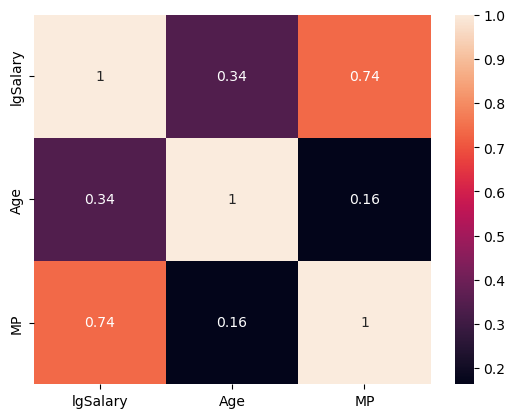

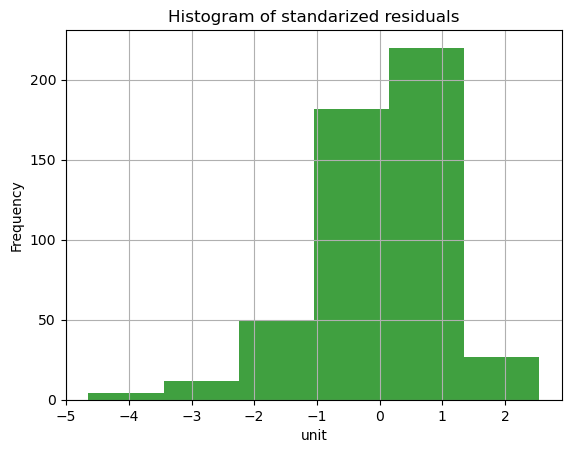

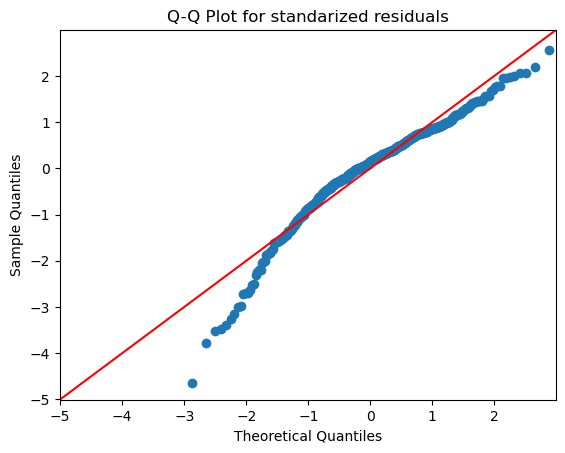


3. Homoskedasticity
H0: Homoskedasticity
H1: Heteroskedasticity


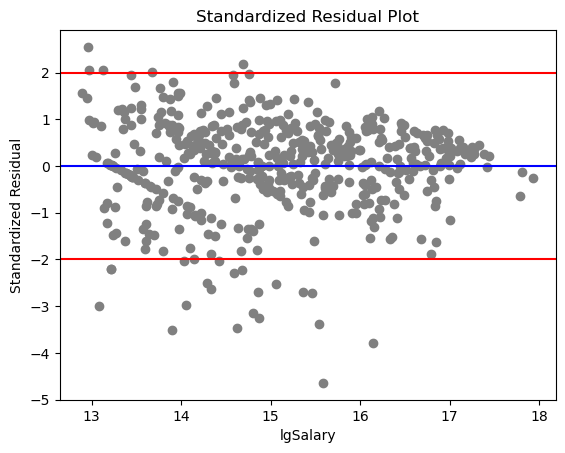

Do not rejected H0. Heteroscedasticity does not appear to be a problem.

4. Independence

4-1. Randomness
H0 : Randomness exists.
H1 : Randomness does not exist.
runs =  248
n1 =  247
n2 =  247
runs_exp =  248.0
stan_dev =  11.1017788169558
z =  0.0
pval_z =  1.0
p_value for Z-statistic=  1.0
Since the p_value = 1.0000 > 0.05, we do not reject the null hypothesis.
That is, we do not have sufficient evidence to claim that randomness does not exist.

4-2. No Autocorrelation
H0 : There is no first-order correlation.
H1 : There is first-order correlation.
Outliers by SD = 

0      2.548160
1     -2.529104
11    -3.464332
27    -2.994931
67    -2.716953
85    -2.043497
88    -2.695596
94    -2.502174
97    -2.689525
103    2.062884
131   -2.001682
150   -2.029859
156   -3.388322
157   -2.969500
159    2.003973
182    2.061318
233   -3.158015
260   -3.259520
287   -4.644932
317   -3.521222
319   -2.208908
333   -3.780721
334   -2.208908
361   -2.637758
373    2.180861
413   -2.301518
423   -

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_36999/776845526.py:201: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lgSalary   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     427.5
Date:                Tue, 28 May 2024   Prob (F-statistic):          2.99e-108
Time:                        21:32:57   Log-Likelihood:                -686.27
No. Observations:                 494   AIC:                             1379.
Df Residuals:                     491   BIC:                             1391.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9139      0.240     45.457      0.000      10.442      11.386
Age            0.0824      0.009      9.398      0.000       0.065       0.100
MP             0.1078      0.004     25.881      0.000       0.100       0.116
==============================================================================
Omnibus:                       90.152   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.145
Skew:                          -1.021   Prob(JB):                     1.53e-38
Kurtosis:                       5.071   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [29]:
y = nba_stats["lgSalary"]
X = nba_stats[["Age", "MP"]]
# sample_data['Age2'] = sample_data['Age'] ** 2
alpha = 0.05

o = my_multiple_linear_regression(y, X, alpha)
o.get_robustcov_results('HC0').summary()

In [16]:
pd.options.mode.chained_assignment = None
y = nba_stats["lgSalary"]
X = nba_stats[["Age"]]
X['MP*USG%'] = nba_stats['MP'] * nba_stats['USG%']
alpha = 0.05
X

,Age,MP*USG%
0,20,83.99
1,22,228.96
2,23,282.58
3,28,485.75
4,31,260.26
...,...,...
489,24,300.46
490,23,166.16
491,26,214.06
492,21,86.24


Multicollinearity will not be a problem.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lgSalary   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     289.6
Date:                Tue, 28 May 2024   Prob (F-statistic):           8.29e-84
Time:                        16:44:41   Log-Likelihood:                -717.47
No. Observations:                 494   AIC:                             1441.
Df Residuals:                     491   BIC:                             1454.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1932      0.291     38.449      0.000      10.621      11.765
Age            0.0994      0.011      8.923      0.000       0.077       0.121
MP*USG%        0.0036      0.000     21.311      0.000       0.003       0.004
==============================================================================
Omnibus:                       63.503   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.891
Skew:                          -0.890   Prob(JB):                     3.02e-20
Kurtosis:                       4.095   Cond. No.                     2.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking for required conditions for error variable:


1. Zero mean
H0: Errors have zero mean.
H1: Errors do not have zero mean.
mean = -0.0002
std. dev. = 1.0005
Number of observation = 494
Hypothesized mean = 0
Significant level = 0.05
t-stat = -0.0046
t critical value one tail = -1.6480
p-value (one-tail) = 0.4982
t critical value two tail = -1.9648
p-value (two-tail) = 0.9964
Since the p_value = 0.9964 > 0.05, we do not reject the null hypothesis.
That is, we do not have sufficient evidence to claim that the errors do not have zero mean.

2. Normality
H0: Errors are normally distributed.
H1: Errors are not normally distributed.
Shapiro-Wilk test for normality:
H0: The distribution is normal.
H1: The distribution is not normal.
For population = standarized residuals
Shapiro statistic = 0.955518 and p_value = 0.000000
Since the p_value = 0.0000 < 0.05, we reject the null hypothesis.
That is, we have sufficient evidence to claim that the distribution is not normal.


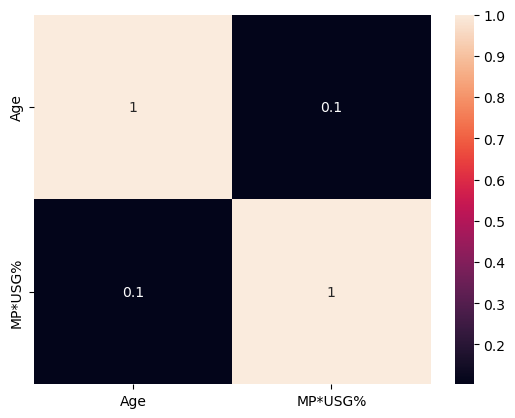

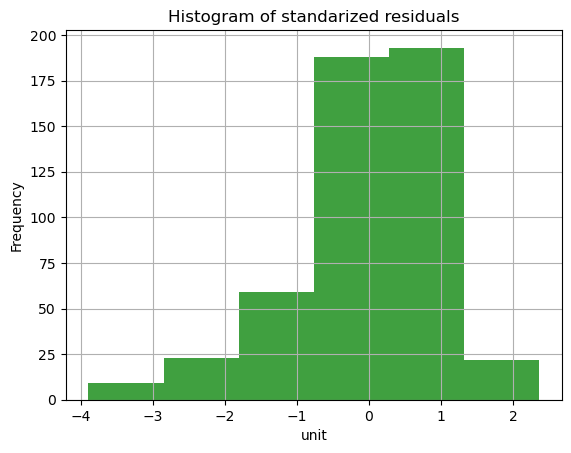

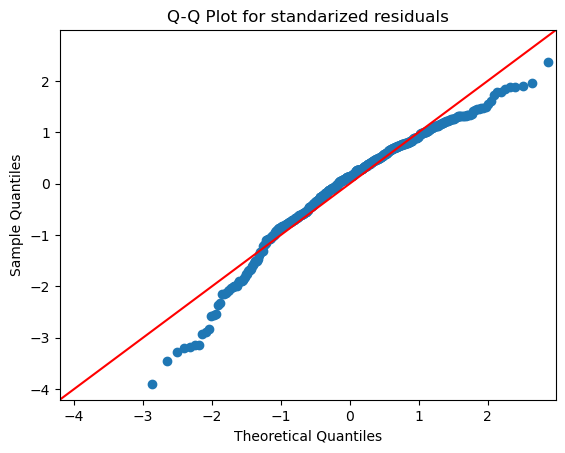


3. Homoskedasticity
H0: Homoskedasticity
H1: Heteroskedasticity


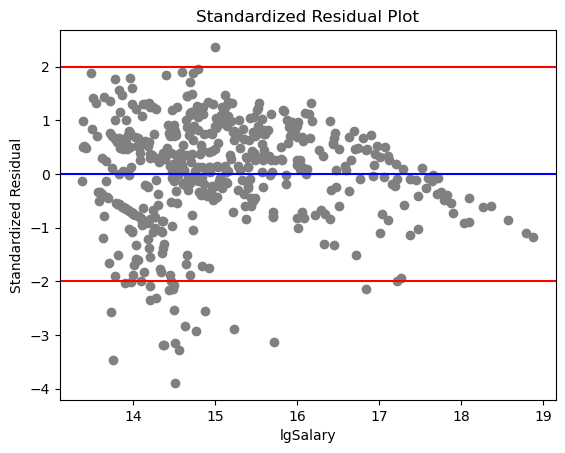

Do not rejected H0. Heteroscedasticity does not appear to be a problem.

4. Independence

4-1. Randomness
H0 : Randomness exists.
H1 : Randomness does not exist.
runs =  240
n1 =  247
n2 =  247
runs_exp =  248.0
stan_dev =  11.1017788169558
z =  -0.7206052410071043
pval_z =  0.47115242835075943
p_value for Z-statistic=  0.47115242835075943
Since the p_value = 0.4712 > 0.05, we do not reject the null hypothesis.
That is, we do not have sufficient evidence to claim that randomness does not exist.

4-2. No Autocorrelation
H0 : There is no first-order correlation.
H1 : There is first-order correlation.
Outliers by SD = 

11    -3.145267
27    -3.458255
50    -2.020915
59    -2.314480
85    -2.087819
94    -2.542690
97    -2.548302
131   -2.153354
156   -2.886071
157   -3.272125
161    2.366281
202   -2.023626
233   -2.934906
260   -2.828001
287   -3.196080
317   -3.893838
319   -3.178695
333   -3.135827
334   -2.574393
354   -2.138175
361   -2.353892
413   -2.070169
434   -2.152935
Name: S

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_36999/1033059547.py:200: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lgSalary   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     376.9
Date:                Tue, 28 May 2024   Prob (F-statistic):          6.39e-100
Time:                        16:44:42   Log-Likelihood:                -717.47
No. Observations:                 494   AIC:                             1441.
Df Residuals:                     491   BIC:                             1454.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1932      0.251     44.624      0.000      10.700      11.686
Age            0.0994      0.009     10.629      0.000       0.081       0.118
MP*USG%        0.0036      0.000     24.028      0.000       0.003       0.004
==============================================================================
Omnibus:                       63.503   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.891
Skew:                          -0.890   Prob(JB):                     3.02e-20
Kurtosis:                       4.095   Cond. No.                     2.85e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
o = my_multiple_linear_regression(y, X, alpha)
o.get_robustcov_results('HC0').summary()